In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.9024 - loss: 0.3103 - val_accuracy: 0.9832 - val_loss: 0.0511
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9852 - loss: 0.0475 - val_accuracy: 0.9864 - val_loss: 0.0433
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9905 - loss: 0.0325 - val_accuracy: 0.9890 - val_loss: 0.0307
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9919 - loss: 0.0241 - val_accuracy: 0.9902 - val_loss: 0.0293
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9950 - loss: 0.0167 - val_accuracy: 0.9912 - val_loss: 0.0273
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9956 - loss: 0.0123 - val_accuracy: 0.9900 - val_loss: 0.0299
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9966 - loss: 0.0114 - val_accuracy: 0.9868 - val_loss: 0.0469
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9972 -

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.9908 - loss: 0.0353

Test accuracy: 0.9908000230789185


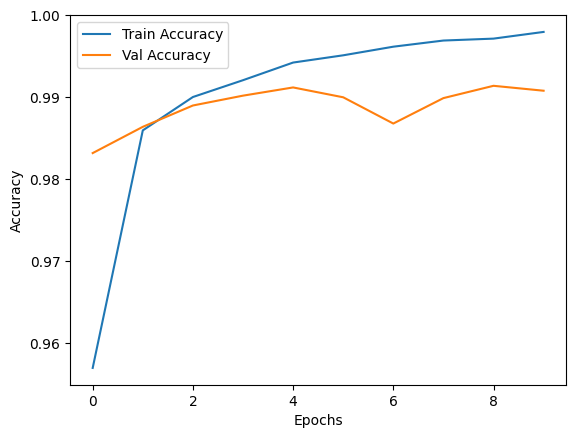

In [7]:
# Visualize accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


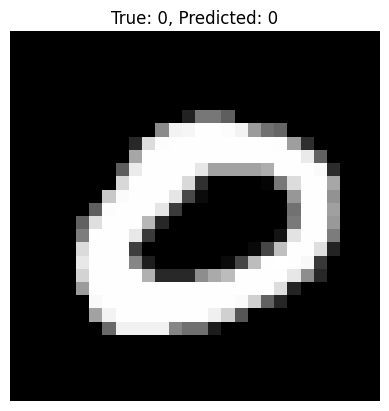

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


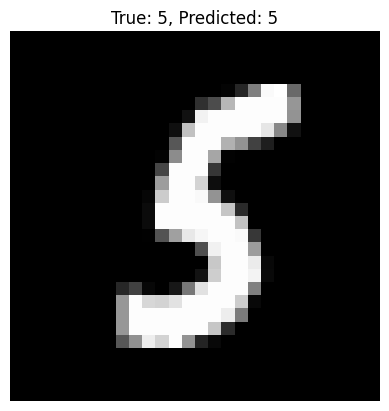

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


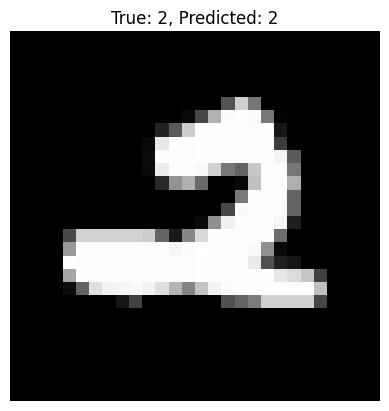

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


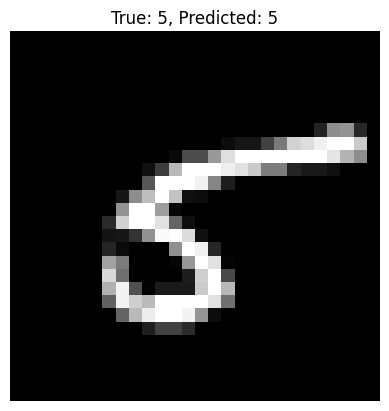

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


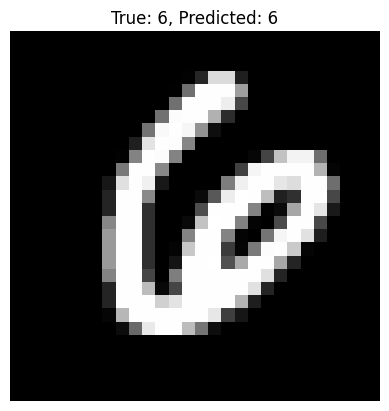

In [8]:
import numpy as np

# Pick a few random images from the test set
num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples, replace=False)

for i, idx in enumerate(random_indices):
    img = x_test[idx]
    label = y_test[idx]

    # Model expects batch dimension
    img_batch = np.expand_dims(img, axis=0)

    # Predict class probabilities
    predictions = model.predict(img_batch)
    predicted_label = np.argmax(predictions)

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

Saving number-9-digit-nine-on-the-background-of-red-silicone-hexagonal-2JJEGMX.jpg to number-9-digit-nine-on-the-background-of-red-silicone-hexagonal-2JJEGMX.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


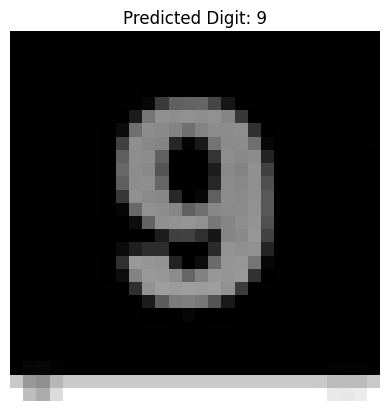

In [11]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

try:
    # For Google Colab or headless Jupyter
    from google.colab import files
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]
except ImportError:
    # For local Jupyter with manual path input
    img_path = input("Enter the path to the image: ")

def preprocess_digit_image(img_path):
    img = Image.open(img_path).convert('L')  # Grayscale
    img = img.resize((28, 28))               # Resize to MNIST size
    img_array = np.array(img)

    # Invert colors if background is white
    if img_array.mean() > 127:
        img_array = 255 - img_array

    img_array = img_array / 255.0            # Normalize
    img_array = img_array.reshape(1, 28, 28, 1)  # Shape for model
    return img_array

# Preprocess and predict
processed_img = preprocess_digit_image(img_path)
predictions = model.predict(processed_img)
predicted_label = np.argmax(predictions)

# Show image and prediction
plt.imshow(processed_img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_label}")
plt.axis('off')
plt.show()